In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import load_data, sort_XyZ

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

### Load data

In [2]:
path = '/Users/macbook/Documents/WorkSpace/Experiments_TKL/netNorm-PY/data/AD_CN/'
modalities = ['CSF.csv', 'GM.csv', 'PET.csv', 'SNP.csv'] 

X_list = []

for modality in modalities:
    data = load_data(path= path + modality, input=True)
    X_list.append(data)
y = load_data(path + 'AD_CN_label.csv', input=False)

X_list, y,Z = sort_XyZ(X_list, y, None)


print("X_shape: ", X_list[1].shape)
print("y shape: ", y.shape)

X_shape:  (231, 200)
y shape:  (231,)


### Load kernel

In [3]:
# Load kernel matrix
linearKernel = []
for i in range(4):
    linearKernel.append(pd.read_csv('results/linear_kernel_matrix_'+str(i)+'.csv', header=None).values)

linearKernel = np.array(linearKernel)
print(linearKernel.shape)

polyKernel = []
for i in range(4):
    polyKernel.append(pd.read_csv('results/poly_kernel_matrix_'+str(i)+'.csv', header=None).values)

polyKernel = np.array(polyKernel)
print(polyKernel.shape)

rbfKernel = []
for i in range(4):
    rbfKernel.append(pd.read_csv('results/rbf_kernel_matrix_'+str(i)+'.csv', header=None).values)

rbfKernel = np.array(rbfKernel)
print(rbfKernel.shape)

(4, 231, 231)
(4, 231, 231)
(4, 231, 231)


### Visualize

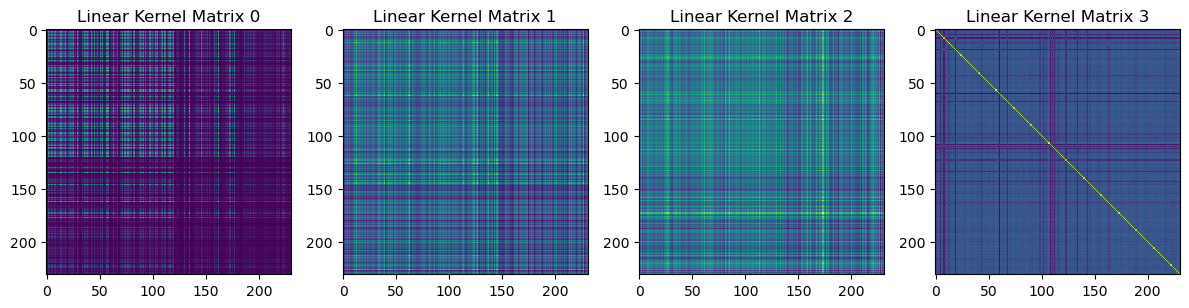

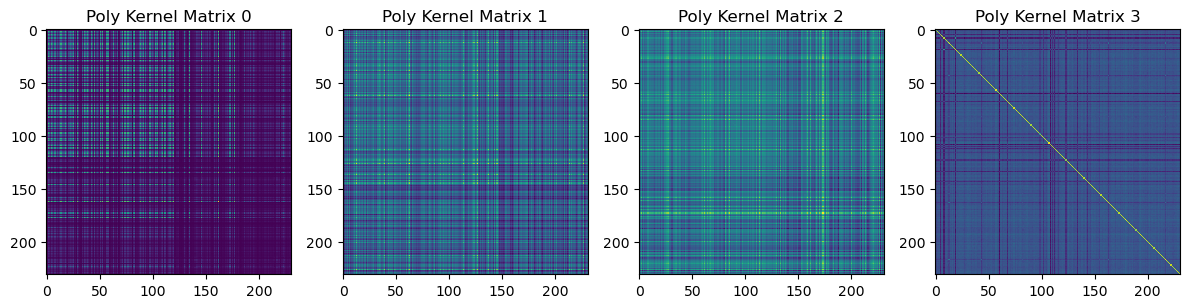

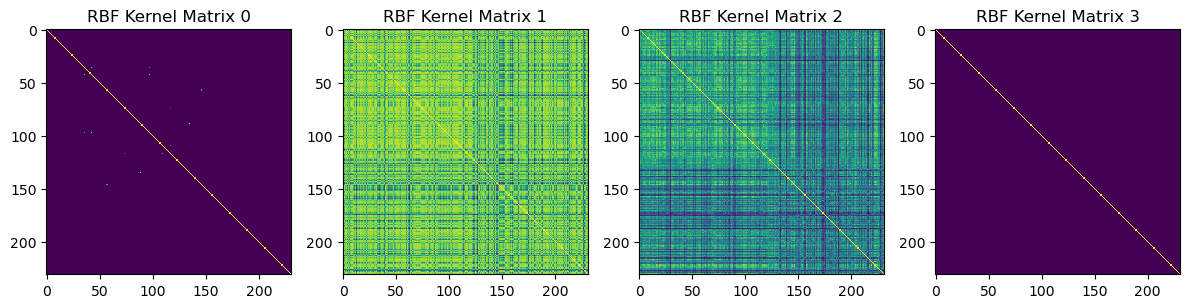

In [13]:
plt.figure(figsize=(12, 4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(linearKernel[i], cmap='viridis', interpolation='nearest')
    plt.title('Linear Kernel Matrix '+str(i))
    # plt.colorbar()
    plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(polyKernel[i], cmap='viridis', interpolation='nearest')
    plt.title('Poly Kernel Matrix '+str(i))
    # plt.colorbar()
    plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(rbfKernel[i], cmap='viridis', interpolation='nearest')
    plt.title('RBF Kernel Matrix '+str(i))
    # plt.colorbar()
    plt.tight_layout()
plt.show()

### Classify

In [7]:
def classify(kernel, y):
    clf = SVC(kernel='precomputed')
    scores = cross_val_score(clf, kernel, y, cv=5)
    print(scores)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    return scores.mean()

In [8]:


# map title to modalities
title = {'CSF': 0, 'GM': 1, 'PET': 2, 'SNP': 3}

acc_linear = []
acc_poly = []
acc_rbf = []

for i in range(4):
    print('Linear Kernel Matrix '+str(i))
    acc_linear.append(classify(linearKernel[i], y))
    print('Poly Kernel Matrix '+str(i))
    acc_poly.append(classify(polyKernel[i], y))
    print('RBF Kernel Matrix '+str(i))
    acc_rbf.append((classify(rbfKernel[i], y)))
    print('--------------------------------------')


Linear Kernel Matrix 0
[0.78723404 0.80434783 0.80434783 0.80434783 0.7826087 ]
Accuracy: 0.80 (+/- 0.02)
Poly Kernel Matrix 0
[0.78723404 0.80434783 0.80434783 0.80434783 0.7826087 ]
Accuracy: 0.80 (+/- 0.02)
RBF Kernel Matrix 0
[0.53191489 0.52173913 0.5        0.5        0.52173913]
Accuracy: 0.52 (+/- 0.03)
--------------------------------------
Linear Kernel Matrix 1
[0.80851064 0.73913043 0.80434783 0.7826087  0.80434783]
Accuracy: 0.79 (+/- 0.05)
Poly Kernel Matrix 1
[0.80851064 0.73913043 0.80434783 0.7826087  0.80434783]
Accuracy: 0.79 (+/- 0.05)
RBF Kernel Matrix 1
[0.82978723 0.80434783 0.7826087  0.76086957 0.80434783]
Accuracy: 0.80 (+/- 0.05)
--------------------------------------
Linear Kernel Matrix 2
[0.91489362 0.82608696 0.86956522 0.91304348 0.7826087 ]
Accuracy: 0.86 (+/- 0.10)
Poly Kernel Matrix 2
[0.91489362 0.82608696 0.86956522 0.91304348 0.7826087 ]
Accuracy: 0.86 (+/- 0.10)
RBF Kernel Matrix 2
[0.87234043 0.86956522 0.91304348 0.7826087  0.76086957]
Accuracy:

In [ ]:
print(acc_linear)
print(acc_poly)
print(acc_rbf)

## Align

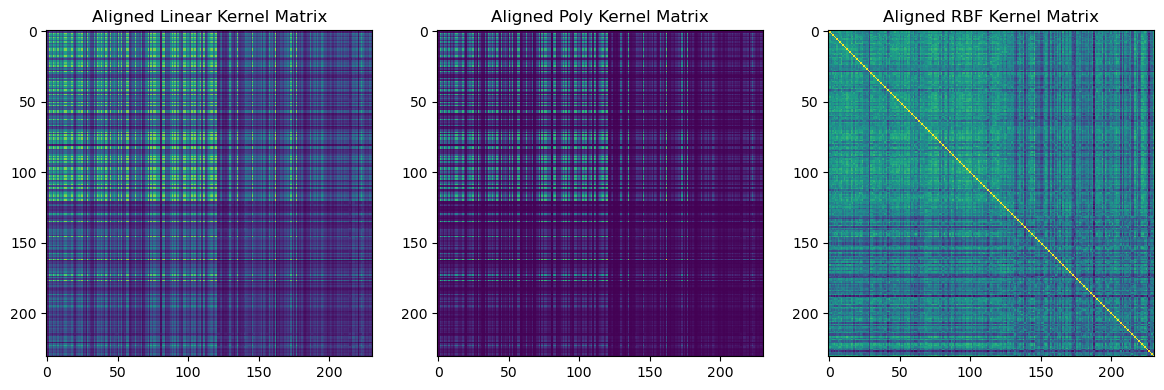

In [9]:
alignLinear = pd.read_csv('results/aligned_kernel_linear.csv', header=None).values
alignPoly = pd.read_csv('results/aligned_kernel_poly.csv', header=None).values
alignRBF = pd.read_csv('results/aligned_kernel_rbf.csv', header=None).values

# Visualize aligned kernel matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(alignLinear, cmap='viridis', interpolation='nearest')
plt.title('Aligned Linear Kernel Matrix')
plt.tight_layout()

plt.subplot(1, 3, 2)
plt.imshow(alignPoly, cmap='viridis', interpolation='nearest')
plt.title('Aligned Poly Kernel Matrix')
plt.tight_layout()

plt.subplot(1, 3, 3)
plt.imshow(alignRBF, cmap='viridis', interpolation='nearest')
plt.title('Aligned RBF Kernel Matrix')
plt.tight_layout()
plt.show()


In [10]:

print('Aligned Linear Kernel Matrix ')
acc_linear.append(classify(alignLinear, y))
print('Aligned Poly Kernel Matrix ')
acc_poly.append(classify(alignPoly, y))
print('Aligned RBF Kernel Matrix ')
acc_rbf.append(classify(alignRBF, y))
print('--------------------------------------')



Aligned Linear Kernel Matrix 
[0.82978723 0.73913043 0.7826087  0.86956522 0.82608696]
Accuracy: 0.81 (+/- 0.09)
Aligned Poly Kernel Matrix 


KeyboardInterrupt: 

## AlignF

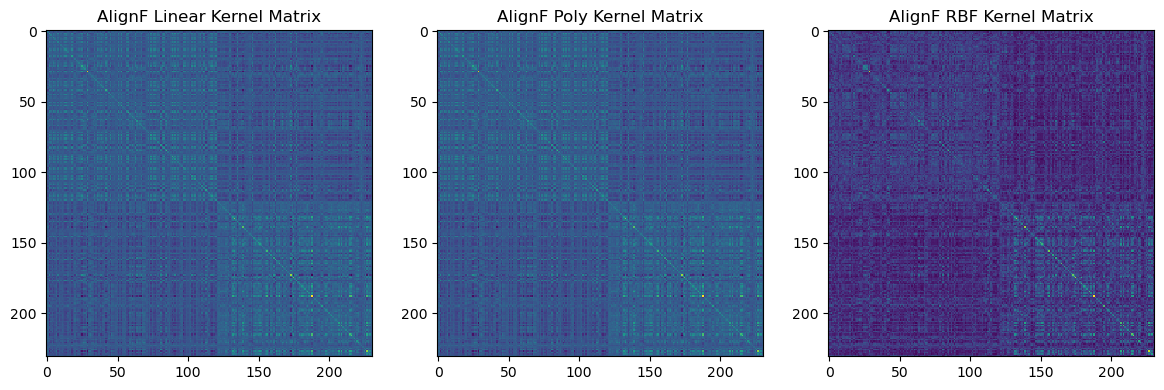

In [ ]:
Alignf_linear = pd.read_csv('results/AlignF_linear.csv', header=None).values
Alignf_poly = pd.read_csv('results/AlignF_poly.csv', header=None).values
Alignf_rbf = pd.read_csv('results/AlignF_rbf.csv', header=None).values

# Visualize aligned kernel matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(Alignf_linear, cmap='viridis', interpolation='nearest')
plt.title('AlignF Linear Kernel Matrix')
plt.tight_layout()

plt.subplot(1, 3, 2)
plt.imshow(Alignf_poly, cmap='viridis', interpolation='nearest')
plt.title('AlignF Poly Kernel Matrix')
plt.tight_layout()

plt.subplot(1, 3, 3)
plt.imshow(Alignf_rbf, cmap='viridis', interpolation='nearest')
plt.title('AlignF RBF Kernel Matrix')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

def classify(kernel, y):
    clf = SVC(kernel='precomputed')
    scores = cross_val_score(clf, kernel, y, cv=5)
    print(scores)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    return scores.mean()

# print("Linear Kernel")
linear_score = classify(Alignf_linear, y)
# print("Poly Kernel")
poly_score = classify(Alignf_poly, y)
# print("RBF Kernel")
rbf_score = classify(Alignf_rbf, y)

print("Linear Kernel: ", linear_score)
print("Poly Kernel: ", poly_score)
print("RBF Kernel: ", rbf_score)

acc_linear.append(linear_score)
acc_poly.append(poly_score)
acc_rbf.append(rbf_score)


[0.95744681 0.86956522 0.82608696 0.89130435 0.82608696]
Accuracy: 0.87 (+/- 0.10)
[0.95744681 0.86956522 0.82608696 0.89130435 0.82608696]
Accuracy: 0.87 (+/- 0.10)
[0.87234043 0.89130435 0.91304348 0.76086957 0.7826087 ]
Accuracy: 0.84 (+/- 0.12)
Linear Kernel:  0.8740980573543016
Poly Kernel:  0.8740980573543016
RBF Kernel:  0.8440333024976873


### Save accuracy

In [ ]:
# Save acc_linear, acc_poly, acc_rbf to dataframe with column names as modalities
kernel_modality = ['CSF', 'GM', 'PET', 'SNP', 'Align', 'Alignf']
df = pd.DataFrame([acc_linear, acc_poly, acc_rbf], columns=kernel_modality)

# Change index 0,1,2 to Linear, Poly, RBF
df.index = ['Linear', 'Poly', 'RBF']
df

,CSF,GM,PET,SNP,Align,Alignf
Linear,0.796577,0.787789,0.861240,0.462997,0.809436,0.874098
Poly,0.796577,0.787789,0.861240,0.462997,0.809528,0.874098
RBF,0.515079,0.796392,0.839685,0.523774,0.852729,0.844033


In [11]:
df = pd.read_csv('results_acc/kernel_classification.csv')
df

,Unnamed: 0,CSF,GM,PET,SNP,Align,Alignf
0,Linear,0.796577,0.787789,0.861240,0.462997,0.809436,0.874098
1,Poly,0.796577,0.787789,0.861240,0.462997,0.809528,0.874098
2,RBF,0.515079,0.796392,0.839685,0.523774,0.852729,0.844033


### MKLaren

In [10]:
from mklaren.mkl.mklaren import Mklaren

def run_mklaren(listKernel,typeKernel):
    model = Mklaren(rank=15, lbd=1, delta=30)
    model.fit([listKernel[0], listKernel[1], listKernel[2], listKernel[3]], y)

    G_1 = model.data[0]["G"]
    G_2= model.data[1]["G"]
    G_3 = model.data[2]["G"]
    G_4 = model.data[3]["G"]

    fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 4))
    for i, (name, K, G) in enumerate(zip([typeKernel+"Kernel_CSF", typeKernel+"Kernel_GM", typeKernel+"Kernel_PET", typeKernel+"Kernel_SNP"], 
                                [listKernel[0], listKernel[1], listKernel[2], listKernel[3]], 
                                [G_1, G_2, G_3, G_4])):
        ax[0, i].set_title(name)
        ax[0, i].imshow(K[:, :])
        ax[1, i].imshow(G.dot(G.T))

    ax[0, 0].set_ylabel("Original")
    ax[1, 0].set_ylabel("Mklaren")
    fig.tight_layout()
    plt.show()

    # combined kernel to use in classification
    combined_kernel = G_1.dot(G_1.T) + G_2.dot(G_2.T) + G_3.dot(G_3.T) + G_4.dot(G_4.T)
    combined_kernel = combined_kernel / 4

    # classify combined kernel
    combined_score = classify(combined_kernel, y)
    print("Combined Kernel: ", combined_score)

    plt.imshow(combined_kernel, cmap='viridis', interpolation='nearest')
    plt.title('Combined Kernel Matrix - Mklaren_Linear')
    plt.tight_layout()
    plt.show()

    return combined_score

    

    


/Users/macbook/Documents/WorkSpace/Experiments_TKL/mklaren/mklaren/mkl/mklaren.py:391: RuntimeWarning: divide by zero encountered in scalar divide
  G[j, k] = (1.0 / G[i, k]) * (K[j, i] - G[j, :k].dot(G[i, :k].T))
/Users/macbook/Documents/WorkSpace/Experiments_TKL/mklaren/mklaren/mkl/mklaren.py:391: RuntimeWarning: invalid value encountered in multiply
  G[j, k] = (1.0 / G[i, k]) * (K[j, i] - G[j, :k].dot(G[i, :k].T))


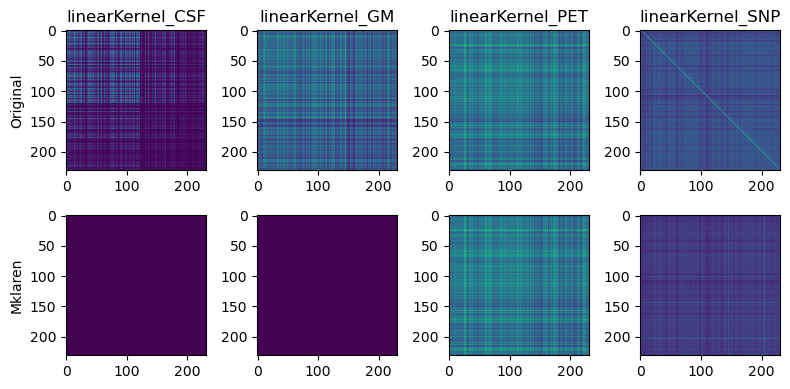

[0.80851064 0.82608696 0.89130435 0.89130435 0.7826087 ]
Accuracy: 0.84 (+/- 0.09)
Combined Kernel:  0.8399629972247918


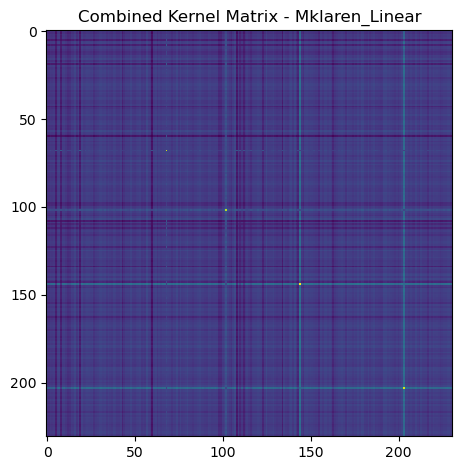

0.8399629972247918

In [11]:
run_mklaren(linearKernel,'linear')

In [ ]:
combined_score_linear = run_mklaren(linearKernel,'linear')
comined_score_poly = run_mklaren(polyKernel, 'poly')
combined_score_rbf = run_mklaren(rbfKernel, 'rbf')

In [57]:
# Create a new column 'Mklaren' in the dataframe
df['Mklaren'] = [combined_score_linear, comined_score_poly, combined_score_rbf]
df

,Unnamed: 0,CSF,GM,PET,SNP,Align,Alignf,Mklaren
0,Linear,0.796577,0.787789,0.861240,0.462997,0.809436,0.874098,0.839963
1,Poly,0.796577,0.787789,0.861240,0.462997,0.809528,0.874098,0.839963
2,RBF,0.515079,0.796392,0.839685,0.523774,0.852729,0.844033,0.826827


In [ ]:
# df.to_csv('results_acc/kernel_classification.csv')